# LAT Calibration Unit Temperature and Humidity History

#### Monitoring the LAT Calibration Unit while it is in storage in Building 003 at SLAC

#### Robert Cameron
#### April 2019

In [1]:
# ASCII csv data file

filename = 'TH-2020-01-24.csv'

In [2]:
#from astropy.io import ascii
import pandas as pd
# avoid the need to include plt.show() commands with the "inline" command
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from matplotlib.dates import (WEEKLY, MONTHLY, YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import datetime as dt
plt.rc('font', size = 12)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns

In [3]:
# read ASCII csv data file

path = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/B003-TempHumidity/"
f = pd.read_csv(path+filename,names=['d','t','h'],skiprows=1,skip_blank_lines=1,parse_dates=['d'])
d = f['d']
t = f['t']
h = f['h']
#f['d']

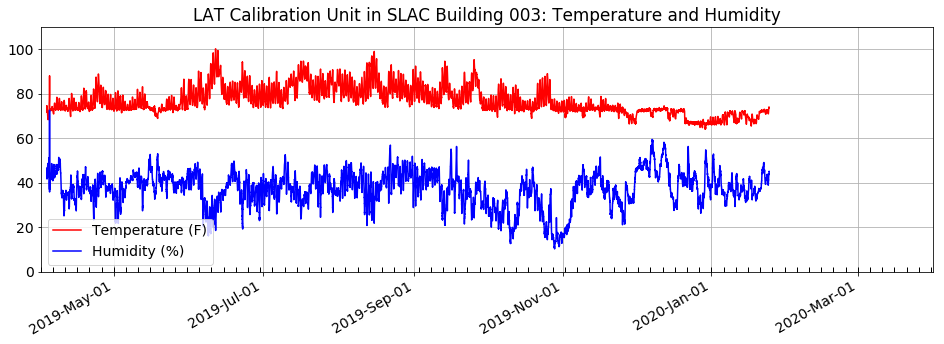

In [11]:
fig = plt.figure(figsize = [16,5])
ax = fig.add_subplot(111)
ax.set_ylim(0,110)
ax.set_xlim([dt.date(2019, 4, 1), dt.date(2020, 4, 1)])
ax.plot(d,t,label='Temperature (F)',color='r')
ax.plot(d,h,label='Humidity (%)',color='b')
ax.legend(loc='lower left')
ax.grid(True)
#plt.xlabel("Time")
#plt.ylabel("Temp, Humidity")
plt.title("LAT Calibration Unit in SLAC Building 003: Temperature and Humidity")

# set Major and Minor ticks on the time axis

#plt.gca().xaxis.set_major_locator(mdates.DayLocator((1,10,20)))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator((0,5,10,15,20,25,30)))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
#plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
#plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
#formatter = mdates.ConciseDateFormatter(locator)    ##### does not exist in my version of Matplotlib!!!
#ax.xaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b-%d"))
plt.gcf().autofmt_xdate()

ax.tick_params(which='minor', length=5, width=1, direction='in')

/Users/rac/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


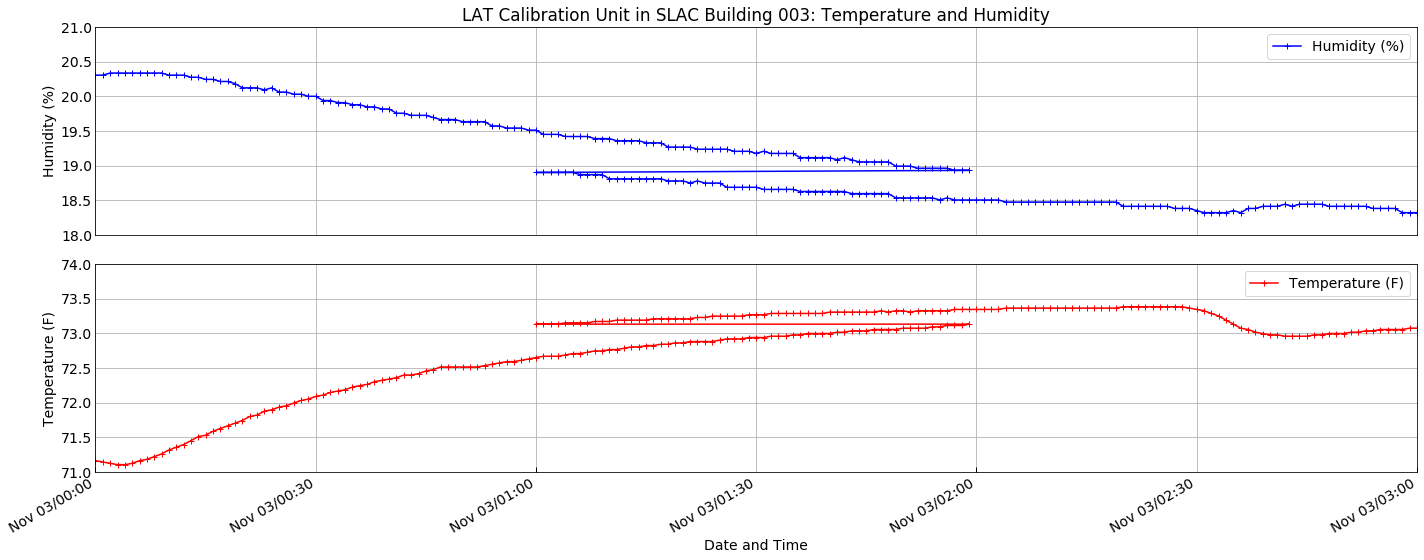

In [5]:
# plot during Daylight Savings Time transition 

# Prettier plotting with seaborn
#sns.set(font_scale=1.5, style="whitegrid")

font = {#'family' : 'normal',
        #'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=[20,8],tight_layout=True)
#fig ax1, ax2 = plt.figure(figsize = [16,5],subplots=2)
#ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(112)
ax1.set_ylim(18,21)
ax2.set_ylim(71,74)
ax1.set_xlim([dt.datetime(2019, 11, 3, 0, 0 ,0), dt.datetime(2019, 11, 3, 3, 0, 0)])
ax2.set_xlim([dt.datetime(2019, 11, 3, 0, 0 ,0), dt.datetime(2019, 11, 3, 3, 0, 0)])
ax2.plot(d,t,label='Temperature (F)',color='r',marker='+')
ax1.set_ylabel('Humidity (%)')
ax2.set_ylabel('Temperature (F)')
ax2.set_xlabel('Date and Time')
ax1.plot(d,h,label='Humidity (%)',color='b',marker='+')
ax1.legend()
ax2.legend()
ax1.grid(True)
ax2.grid(True)

ax1.set_title("LAT Calibration Unit in SLAC Building 003: Temperature and Humidity")

# format the time axis
#ax.xaxis.set_major_locator(mdates.MonthdayLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %d/%H:%M"))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax1.tick_params(which='minor', length=5, width=1, direction='in')
ax1.tick_params(which='major', length=0)
ax2.tick_params(which='minor', length=5, width=1, direction='in')
ax2.tick_params(which='major', length=0)
fig.autofmt_xdate()

In [6]:
# next plot the most recent 2 or 3 months

m = dt.datetime.now().month
y = dt.datetime.now().year
mp = m - 2
yp = y
if mp < 1:
    mp += 12
    yp -= 1
past = dt.date(yp, mp, 1)
mf = m + 1
yf = y
if mf > 12:
    mf -= 12
    yf += 1
future = dt.date(yf, mf, 1)
#past, future

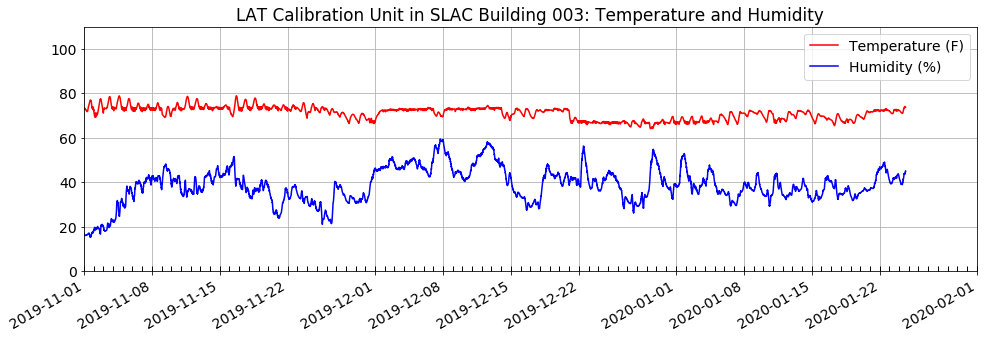

In [7]:
# plot the most recent 2 to 3 months

# Prettier plotting with seaborn
#sns.set(font_scale=1.5, style="whitegrid")

fig = plt.figure(figsize = [16,5])
ax = fig.add_subplot(111)
ax.set_ylim(0,110)
ax.set_xlim([past, future])
ax.plot(d,t,label='Temperature (F)',color='r')
ax.plot(d,h,label='Humidity (%)',color='b')
ax.legend()
ax.grid(True)
plt.title("LAT Calibration Unit in SLAC Building 003: Temperature and Humidity")

# format the time axis
#ax.xaxis.set_major_locator(mdates.MonthdayLocator(interval=2))
plt.gca().xaxis.set_major_locator(mdates.DayLocator((1,8,15,22)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.tick_params(which='minor', length=5, width=1, direction='in')
fig.autofmt_xdate()

In [8]:
# plot the last 2 weeks

# convert a pandas/numpy datetime64[ns] format to a datetime format
ns = 1e-9 # number of seconds in a nanosecond
dend = dt.datetime.utcfromtimestamp(d[-1:].astype(int) * ns)
past = dend.date() - dt.timedelta(days=14)
future = dend.date() + dt.timedelta(days=1)

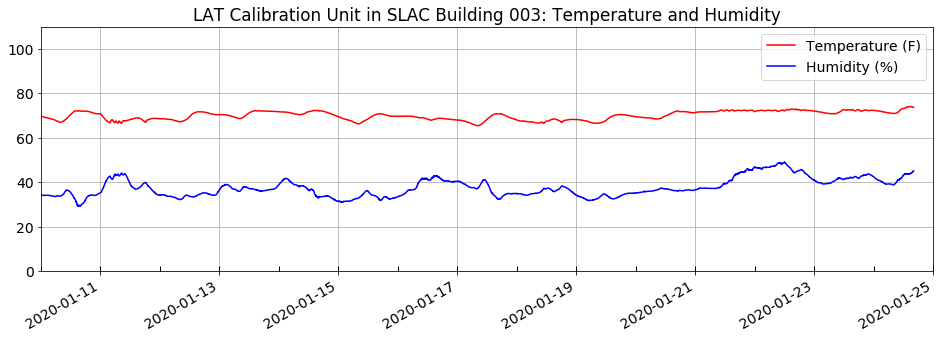

In [9]:
# plot the last 2 weeks

fig = plt.figure(figsize = [16,5])
ax = fig.add_subplot(111)
ax.set_ylim(0,110)
ax.set_xlim([past, future])
ax.plot(d,t,label='Temperature (F)',color='r')
ax.plot(d,h,label='Humidity (%)',color='b')
ax.legend()
ax.grid(True)
plt.title("LAT Calibration Unit in SLAC Building 003: Temperature and Humidity")

# format the time axis
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.tick_params(which='minor', length=5, width=1, direction='in')
fig.autofmt_xdate()